# importing libraries

In [ ]:
!pip install tensorflow

In [ ]:
!python --version

In [ ]:
# Installing following in the Anaconda Commandline Prompt

conda create -n tf-jupyter python=3.10 -y
conda activate tf-jupyter
pip install --upgrade pip
pip install tensorflow jupyter ipykernel
python -m ipykernel install --user --name=tf-jupyter --display-name "Python (tf-jupyter)"
pip install Pillow

In [2]:
!pip install Pillow

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install --user Pillow

In [3]:
!pip install scikit-learn matplotlib seaborn

^C
Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for numpy>=1.17.3 from https://files.pythonhosted.org/packages/3f/6b/5610004206cf7f8e7ad91c5a85a8c71b2f2f8051a0c0c4d5916b76d6cbb2/numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.8 MB 325.1 kB/s eta 0:00:49
   ---------------------------------------- 0.0/15.8 MB 325.1 kB/s eta 0:00:49
   ---------------------------------------- 0.0/15.8 MB 325.1 kB/s eta 0:00:49
   ---------------------------------------- 0.0/15.8 MB 163.4 kB/s eta 0:01:37
   ---------------------------------------- 0.1/15.8 MB 252.2 kB/s eta 0:01:03
   ---------------------------------------- 0.1/15.8 MB 254.2 kB/s eta 0:01:02
   ------------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
transformers 2.1.1 requires sentencepiece, which is not installed.
numba 0.57.0 requires numpy<1.25,>=1.21, but you have numpy 1.26.4 which is incompatible.


In [21]:
# 📦 IMPORTS
import os
import shutil
import numpy as np
import zipfile
import tempfile
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# configuration

In [5]:
# ✅ CONFIGURATION
source_fit = r'I:\Fit'
source_overweight = r'I:\Overweight - Copy'
source_underweight = r'I:\Underweight'
dataset_dir = "dataset"
fit_target = os.path.join(dataset_dir, "Fit")
overweight_target = os.path.join(dataset_dir, "Overweight")
underweight_target = os.path.join(dataset_dir, "Underweight")
output_model_path = "fitness_model_3class.h5"

IMG_SIZE = 150
BATCH_SIZE = 16
EPOCHS = 10


In [6]:
import shutil
import os

source_underweight = r'I:\Underweight'
target_underweight = os.path.join("dataset", "Underweight")

# Ensure target directory exists
os.makedirs(target_underweight, exist_ok=True)

# Copy images
for filename in os.listdir(source_underweight):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):
        full_file_name = os.path.join(source_underweight, filename)
        shutil.copy(full_file_name, target_underweight)

print("✅ Images copied to dataset/Underweight.")

# === Fit ===
source_fit = r'I:\Fit'
target_fit = os.path.join("dataset", "Fit")
os.makedirs(target_fit, exist_ok=True)

for filename in os.listdir(source_fit):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):
        full_file_name = os.path.join(source_fit, filename)
        shutil.copy(full_file_name, target_fit)

print("✅ Images copied to dataset/Fit.")

# === Overweight ===
source_overweight = r'I:\Overweight'
target_overweight = os.path.join("dataset", "Overweight")
os.makedirs(target_overweight, exist_ok=True)

for filename in os.listdir(source_overweight):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):
        full_file_name = os.path.join(source_overweight, filename)
        shutil.copy(full_file_name, target_overweight)

print("✅ Images copied to dataset/Overweight.")


✅ Images copied to dataset/Underweight.


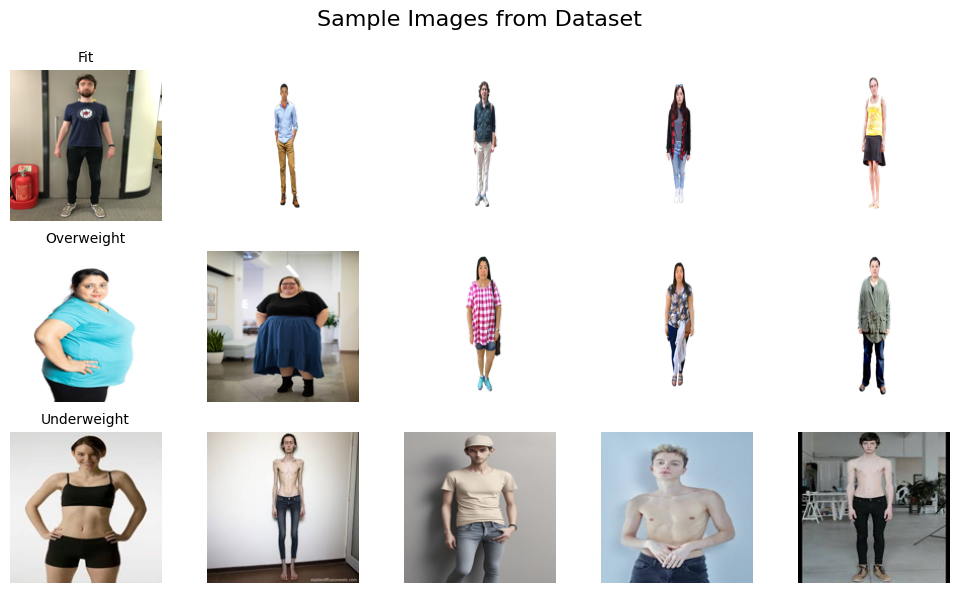

In [7]:
import matplotlib.pyplot as plt
import os
from PIL import Image

def show_sample_images(base_dir, classes, img_size=IMG_SIZE, samples_per_class=5):
    plt.figure(figsize=(samples_per_class * 2, len(classes) * 2))

    for class_idx, class_name in enumerate(classes):
        class_dir = os.path.join(base_dir, class_name)
        image_files = [f for f in os.listdir(class_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))][:samples_per_class]

        for i, img_file in enumerate(image_files):
            img_path = os.path.join(class_dir, img_file)
            img = Image.open(img_path).resize((img_size, img_size))

            ax = plt.subplot(len(classes), samples_per_class, class_idx * samples_per_class + i + 1)
            plt.imshow(img)
            plt.axis("off")
            if i == 0:
                ax.set_title(class_name, fontsize=10)

    plt.tight_layout()
    plt.suptitle("Sample Images from Dataset", fontsize=16)
    plt.subplots_adjust(top=0.88)
    plt.show()

# Usage
show_sample_images(dataset_dir, ["Fit", "Overweight", "Underweight"])


In [8]:
def check_corrupt_images(folder_path):
    corrupt_images = []
    total_images = 0

    for filename in os.listdir(folder_path):
        if filename.lower().endswith((".jpg", ".jpeg", ".png")):
            total_images += 1
            file_path = os.path.join(folder_path, filename)
            try:
                with Image.open(file_path) as img:
                    img.verify()  # Verifies image integrity
            except (IOError, SyntaxError) as e:
                corrupt_images.append(filename)

    print(f"Total images checked: {total_images}")
    print(f"Corrupt images found: {len(corrupt_images)}")
    if corrupt_images:
        print("List of corrupt images:")
        for img in corrupt_images:
            print(" -", img)

check_corrupt_images(r"I:\Underweight")

Total images checked: 164
Corrupt images found: 0


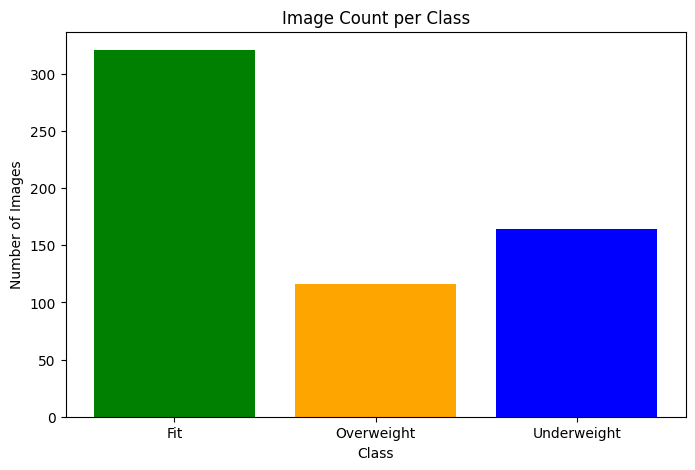

In [9]:
import os
import matplotlib.pyplot as plt

dataset_dir = "dataset"

categories = ["Fit", "Overweight", "Underweight"]
image_counts = []

for category in categories:
    folder = os.path.join(dataset_dir, category)
    count = len([file for file in os.listdir(folder) if file.lower().endswith(('.jpg', '.jpeg', '.png'))])
    image_counts.append(count)

# Plotting
plt.figure(figsize=(8, 5))
plt.bar(categories, image_counts, color=['green', 'orange', 'blue'])
plt.title("Image Count per Class")
plt.ylabel("Number of Images")
plt.xlabel("Class")
plt.show()


# Creating dataset folders

In [10]:
# ✅ CREATE FOLDERS
print("📁 Creating dataset folders...")
os.makedirs(fit_target, exist_ok=True)
os.makedirs(overweight_target, exist_ok=True)
os.makedirs(underweight_target, exist_ok=True)

# ✅ COPY IMAGES FUNCTION
def copy_images(src, dst):
    print(f"📂 Copying from {src} to {dst}...")
    for filename in os.listdir(src):
        if filename.startswith("."):
            continue
        src_path = os.path.join(src, filename)
        dst_path = os.path.join(dst, filename)
        if os.path.isfile(src_path):
            shutil.copy(src_path, dst_path)

📁 Creating dataset folders...


# COPY IMAGES to dataset

In [11]:
# === ✅ COPY IMAGES ===
def copy_images(src, dst):
    print(f"📂 Copying from {src} to {dst}...")
    for filename in os.listdir(src):
        if filename.startswith("."):  # Skip hidden files
            continue
        src_path = os.path.join(src, filename)
        dst_path = os.path.join(dst, filename)
        if os.path.isfile(src_path):
            shutil.copy(src_path, dst_path)

copy_images(source_fit, fit_target)
copy_images(source_overweight, overweight_target)

📂 Copying from I:\Fit to dataset\Fit...
📂 Copying from I:\Overweight - Copy to dataset\Overweight...


# REMOVE CORRUPT IMAGES

In [13]:
# ✅ REMOVE CORRUPT IMAGES
def remove_corrupt_images(folder):
    print(f"🧹 Checking for corrupt images in {folder}...")
    for filename in os.listdir(folder):
        if filename.startswith("."):
            continue
        file_path = os.path.join(folder, filename)
        try:
            with Image.open(file_path) as img:
                img.verify()
        except Exception as e:
            print(f"❌ Removing corrupt image: {file_path} — {e}")
            os.remove(file_path)

remove_corrupt_images(fit_target)
remove_corrupt_images(overweight_target)
remove_corrupt_images(underweight_target)

🧹 Checking for corrupt images in dataset\Fit...
🧹 Checking for corrupt images in dataset\Overweight...
🧹 Checking for corrupt images in dataset\Underweight...


#  DATA GENERATORS

In [14]:

# ✅ DATA GENERATORS
print("🔄 Preparing image generators...")
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # 🆕 3 classes
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

🔄 Preparing image generators...
Found 482 images belonging to 3 classes.
Found 119 images belonging to 3 classes.


# CNN model

In [15]:
# ✅ MODEL DEFINITION
print("🧠 Building the CNN model...")
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 🆕 3 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

🧠 Building the CNN model...


C:\Users\DELL\.conda\envs\tf-jupyter\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,636,739 (40.58 MB)

 Trainable params: 10,636,739 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# ✅ TRAINING
print("🚀 Starting training...")
model.fit(train_gen, epochs=EPOCHS, validation_data=val_gen)

🚀 Starting training...


C:\Users\DELL\.conda\envs\tf-jupyter\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.5841 - loss: 1.6684 - val_accuracy: 0.7356 - val_loss: 0.5387
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.7652 - loss: 0.5138 - val_accuracy: 0.7816 - val_loss: 0.4359
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.8186 - loss: 0.3754 - val_accuracy: 0.8621 - val_loss: 0.3619
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.9052 - loss: 0.2723 - val_accuracy: 0.8966 - val_loss: 0.3489
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.9201 - loss: 0.2292 - val_accuracy: 0.8851 - val_loss: 0.5822
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.8993 - loss: 0.2385 - val_accuracy: 0.8736 - val_loss: 0.3526
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9805 - loss: 0.0948 - val_accuracy: 0.8736 - val_loss: 0.3831
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.9791 - loss: 0.0778 - val_accuracy: 0.8851 - val_loss:

# Save model

In [10]:

# ✅ SAVE MODEL
model.save(output_model_path)
print(f"✅ Model saved as {output_model_path}")


✅ Model saved as fitness_model_3class.h5


# Predict image

In [11]:
#predict single image

def predict_image(image_path, return_result=False):
    print(f"📸 Analyzing: {os.path.basename(image_path)}")
    model = load_model(".h5")

    img = Image.open(image_path).convert("RGB")
    img = img.resize((150, 150))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)[0]
    predicted_class = np.argmax(predictions)
    confidence = predictions[predicted_class]

    labels = ["Fit 🏋️‍♀️", "Overweight 🍔", "Underweight 🦴"]
    result = labels[predicted_class]

    if return_result:
        return f"{result} (confidence: {confidence:.2f})"
    else:
        print(f"✅ Prediction: {result} (confidence: {confidence:.2f})")

# Test model

In [16]:
import os
import zipfile
import tempfile
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image

#  Define the prediction function
def predict_image(image_path, return_result=False):
    print(f" Analyzing: {os.path.basename(image_path)}")
    
    # Load your trained model (ensure this .h5 file is in your script directory)
    model = load_model("fitness_model_3class.h5")

    # Load and preprocess image
    img = Image.open(image_path).convert("RGB")
    img = img.resize((150, 150))  # Match your model's input size
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    predictions = model.predict(img_array)[0]
    predicted_class = np.argmax(predictions)
    confidence = predictions[predicted_class]

    labels = ["Fit ", "Overweight ", "Underweight "]
    result = labels[predicted_class]

    if return_result:
        return f"{result} (confidence: {confidence:.2f})"
    else:
        print(f" Prediction: {result} (confidence: {confidence:.2f})")

#  Ask for ZIP file
zip_path = input(" Enter path to ZIP file with images: ").strip('"').strip("'")

if not (os.path.isfile(zip_path) and zipfile.is_zipfile(zip_path)):
    print(" Invalid ZIP file path. Please try again.")
    exit()

print(" Extracting ZIP file...")

#  Extraction and prediction
with tempfile.TemporaryDirectory() as tmp_dir:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(tmp_dir)

    print(" Analyzing extracted images...\n")

    fit_count = 0
    overweight_count = 0
    underweight_count = 0
    results = []

    for root, dirs, files in os.walk(tmp_dir):
        for filename in files:
            if filename.startswith("._") or not filename.lower().endswith((".jpg", ".jpeg", ".png")):
                print(f" Skipping invalid file: {filename}")
                continue

            image_path = os.path.join(root, filename)

            try:
                prediction = predict_image(image_path, return_result=True)
                results.append(f"{filename}: {prediction}")

                if "Fit" in prediction:
                    fit_count += 1
                elif "Overweight" in prediction:
                    overweight_count += 1
                elif "Underweight" in prediction:
                    underweight_count += 1

            except Exception as e:
                print(f" Error processing {filename}: {e}")

    # Save results
    with open("results.txt", "w") as f:
        for line in results:
            f.write(line + "\n")

    print("\n Analysis Summary:")
    print(f" Total Fit: {fit_count}")
    print(f" Total Overweight: {overweight_count}")
    print(f" Total Underweight: {underweight_count}")
    print(f" Full results saved to 'results.txt'")

 Enter path to ZIP file with images: C:\Users\DELL\Downloads\Untitled Dataset.zip
 Extracting ZIP file...
 Analyzing extracted images...

 Analyzing: 1.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
 Analyzing: 10.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
 Analyzing: 100.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
 Analyzing: 101.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
 Analyzing: 102.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
 Analyzing: 103.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
 Analyzing: 104.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
 Analyzing: 105.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
 Analyzing: 106.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
 Analyzing: 107.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
 Analyzing: 108.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
 Analyzing: 109.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
 Analyzing: 11.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
 Analyzing: 110.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
 Analyzing: 111.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
 Analyzing: 112.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
 Analyzing: 113.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
 Analyzing: 114.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
 Analyzing: 115.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
 Analyzing: 116.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
 Analyzing: 117.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
 Analyzing: 118.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
 Analyzing: 119.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
 Analyzing: 12.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
 Analyzing: 120.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
 Analyzing: 121.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
 Analyzing: 122.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
 Analyzing: 123.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
 Analyzing: 124.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
 Analyzing: 125.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
 Analyzing: 126.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
 Analyzing: 127.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
 Analyzing: 128.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
 Analyzing: 129.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
 Analyzing: 13.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
 Analyzing: 130.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
 Analyzing: 131.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
 Analyzing: 132.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
 Analyzing: 133.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
 Analyzing: 134.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
 Analyzing: 135.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
 Analyzing: 136.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
 Analyzing: 137.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
 Analyzing: 138.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
 Analyzing: 139.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
 Analyzing: 14.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
 Analyzing: 140.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
 Analyzing: 141.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
 Analyzing: 142.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
 Analyzing: 143.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
 Analyzing: 144.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
 Analyzing: 145.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
 Analyzing: 146.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
 Analyzing: 147.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
 Analyzing: 148.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
 Analyzing: 149.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
 Analyzing: 15.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step
 Analyzing: 150.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
 Analyzing: 151.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
 Analyzing: 152.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
 Analyzing: 153.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
 Analyzing: 154.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
 Analyzing: 155.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
 Analyzing: 156.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
 Analyzing: 157.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
 Analyzing: 158.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
 Analyzing: 159.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
 Analyzing: 16.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
 Analyzing: 160.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
 Analyzing: 161.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
 Analyzing: 162.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
 Analyzing: 163.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
 Analyzing: 164.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
 Analyzing: 165.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


 Analyzing: 166.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
 Analyzing: 167.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
 Analyzing: 168.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
 Analyzing: 169.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
 Analyzing: 17.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
 Analyzing: 170.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
 Analyzing: 171.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
 Analyzing: 172.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
 Analyzing: 173.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
 Analyzing: 174.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
 Analyzing: 175.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
 Analyzing: 176.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
 Analyzing: 177.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
 Analyzing: 178.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
 Analyzing: 179.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
 Analyzing: 18.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
 Analyzing: 180.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
 Analyzing: 181.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
 Analyzing: 182.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
 Analyzing: 183.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
 Analyzing: 184.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
 Analyzing: 185.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
 Analyzing: 186.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
 Analyzing: 187.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
 Analyzing: 188.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
 Analyzing: 189.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
 Analyzing: 19.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
 Analyzing: 190.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
 Analyzing: 191.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
 Analyzing: 192.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
 Analyzing: 193.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
 Analyzing: 194.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
 Analyzing: 195.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
 Analyzing: 196.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
 Analyzing: 197.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
 Analyzing: 198.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
 Analyzing: 199.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
 Analyzing: 2.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
 Analyzing: 20.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
 Analyzing: 200.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
 Analyzing: 201.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
 Analyzing: 202.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
 Analyzing: 203.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
 Analyzing: 204.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
 Analyzing: 205.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
 Analyzing: 206.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
 Analyzing: 207.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
 Analyzing: 208.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
 Analyzing: 209.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
 Analyzing: 21.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
 Analyzing: 210.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
 Analyzing: 211.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
 Analyzing: 212.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
 Analyzing: 213.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
 Analyzing: 214.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
 Analyzing: 215.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
 Analyzing: 216.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
 Analyzing: 217.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
 Analyzing: 218.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
 Analyzing: 219.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
 Analyzing: 22.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
 Analyzing: 220.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
 Analyzing: 221.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
 Analyzing: 222.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
 Analyzing: 223.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
 Analyzing: 224.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
 Analyzing: 225.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
 Analyzing: 226.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
 Analyzing: 227.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
 Analyzing: 228.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
 Analyzing: 229.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
 Analyzing: 23.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
 Analyzing: 230.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
 Analyzing: 231.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
 Analyzing: 232.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
 Analyzing: 233.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
 Analyzing: 234.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
 Analyzing: 235.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
 Analyzing: 236.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
 Analyzing: 237.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
 Analyzing: 238.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
 Analyzing: 239.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
 Analyzing: 24.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
 Analyzing: 240.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
 Analyzing: 241.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
 Analyzing: 242.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
 Analyzing: 243.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
 Analyzing: 244.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
 Analyzing: 245.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
 Analyzing: 246.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
 Analyzing: 247.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
 Analyzing: 248.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
 Analyzing: 249.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
 Analyzing: 25.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
 Analyzing: 250.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
 Analyzing: 251.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
 Analyzing: 252.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
 Analyzing: 253.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
 Analyzing: 254.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
 Analyzing: 255.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
 Analyzing: 256.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
 Analyzing: 257.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
 Analyzing: 258.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
 Analyzing: 259.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
 Analyzing: 26.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
 Analyzing: 260.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
 Analyzing: 261.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
 Analyzing: 262.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
 Analyzing: 263.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
 Analyzing: 264.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
 Analyzing: 265.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
 Analyzing: 266.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
 Analyzing: 267.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
 Analyzing: 268.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
 Analyzing: 269.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
 Analyzing: 27.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
 Analyzing: 270.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
 Analyzing: 271.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
 Analyzing: 272.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
 Analyzing: 273.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
 Analyzing: 274.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
 Analyzing: 275.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
 Analyzing: 276.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
 Analyzing: 277.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
 Analyzing: 278.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
 Analyzing: 279.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
 Analyzing: 28.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
 Analyzing: 280.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step
 Analyzing: 281.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
 Analyzing: 282.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
 Analyzing: 283.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
 Analyzing: 284.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
 Analyzing: 285.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
 Analyzing: 286.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
 Analyzing: 287.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
 Analyzing: 288.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
 Analyzing: 289.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
 Analyzing: 29.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
 Analyzing: 290.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
 Analyzing: 291.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
 Analyzing: 292.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
 Analyzing: 293.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
 Analyzing: 294.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
 Analyzing: 295.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
 Analyzing: 296.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
 Analyzing: 297.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
 Analyzing: 298.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
 Analyzing: 299.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
 Analyzing: 3.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
 Analyzing: 30.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
 Analyzing: 300.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
 Analyzing: 301.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
 Analyzing: 302.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
 Analyzing: 303.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
 Analyzing: 304.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


 Analyzing: 305.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
 Analyzing: 306.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
 Analyzing: 307.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
 Analyzing: 308.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
 Analyzing: 309.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
 Analyzing: 31.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
 Analyzing: 310.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
 Analyzing: 311.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
 Analyzing: 312.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
 Analyzing: 313.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
 Analyzing: 314.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
 Analyzing: 315.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
 Analyzing: 316.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
 Analyzing: 317.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
 Analyzing: 318.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
 Analyzing: 319.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
 Analyzing: 32.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
 Analyzing: 320.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
 Analyzing: 321.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
 Analyzing: 322.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 437ms/step
 Analyzing: 323.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
 Analyzing: 324.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
 Analyzing: 325.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
 Analyzing: 326.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
 Analyzing: 327.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
 Analyzing: 328.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
 Analyzing: 329.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
 Analyzing: 33.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
 Analyzing: 330.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
 Analyzing: 331.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
 Analyzing: 332.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step
 Analyzing: 333.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
 Analyzing: 334.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
 Analyzing: 335.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
 Analyzing: 336.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


 Analyzing: 337.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
 Analyzing: 338.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
 Analyzing: 339.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
 Analyzing: 34.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
 Analyzing: 340.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
 Analyzing: 341.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
 Analyzing: 342.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
 Analyzing: 343.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
 Analyzing: 344.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
 Analyzing: 345.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
 Analyzing: 346.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
 Analyzing: 347.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
 Analyzing: 348.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
 Analyzing: 349.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
 Analyzing: 35.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
 Analyzing: 350.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
 Analyzing: 351.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
 Analyzing: 352.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
 Analyzing: 353.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
 Analyzing: 354.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
 Analyzing: 355.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
 Analyzing: 356.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
 Analyzing: 357.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
 Analyzing: 358.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
 Analyzing: 359.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
 Analyzing: 36.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
 Analyzing: 360.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
 Analyzing: 361.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
 Analyzing: 362.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
 Analyzing: 363.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
 Analyzing: 364.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
 Analyzing: 365.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
 Analyzing: 366.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
 Analyzing: 367.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
 Analyzing: 368.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
 Analyzing: 369.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
 Analyzing: 37.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
 Analyzing: 370.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
 Analyzing: 371.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
 Analyzing: 372.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
 Analyzing: 373.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
 Analyzing: 374.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
 Analyzing: 375.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
 Analyzing: 376.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
 Analyzing: 377.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
 Analyzing: 378.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
 Analyzing: 379.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
 Analyzing: 38.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
 Analyzing: 380.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
 Analyzing: 381.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
 Analyzing: 382.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
 Analyzing: 383.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
 Analyzing: 384.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
 Analyzing: 385.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
 Analyzing: 386.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
 Analyzing: 387.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
 Analyzing: 388.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
 Analyzing: 389.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
 Analyzing: 39.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
 Analyzing: 390.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
 Analyzing: 391.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
 Analyzing: 392.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
 Analyzing: 393.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
 Analyzing: 394.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
 Analyzing: 395.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


 Analyzing: 396.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
 Analyzing: 397.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
 Analyzing: 398.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
 Analyzing: 399.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
 Analyzing: 4.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
 Analyzing: 40.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
 Analyzing: 400.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
 Analyzing: 401.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
 Analyzing: 402.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
 Analyzing: 403.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
 Analyzing: 404.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
 Analyzing: 405.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
 Analyzing: 406.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
 Analyzing: 407.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
 Analyzing: 408.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
 Analyzing: 409.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
 Analyzing: 41.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
 Analyzing: 410.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
 Analyzing: 411.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
 Analyzing: 412.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
 Analyzing: 413.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
 Analyzing: 414.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
 Analyzing: 415.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
 Analyzing: 416.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
 Analyzing: 417.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
 Analyzing: 418.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
 Analyzing: 419.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
 Analyzing: 42.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
 Analyzing: 420.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
 Analyzing: 421.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
 Analyzing: 422.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
 Analyzing: 423.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
 Analyzing: 424.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
 Analyzing: 425.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
 Analyzing: 426.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
 Analyzing: 427.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
 Analyzing: 428.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
 Analyzing: 429.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
 Analyzing: 43.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
 Analyzing: 430.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
 Analyzing: 431.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
 Analyzing: 432.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
 Analyzing: 433.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
 Analyzing: 434.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
 Analyzing: 435.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
 Analyzing: 436.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
 Analyzing: 437.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
 Analyzing: 44.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
 Analyzing: 45.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
 Analyzing: 46.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
 Analyzing: 47.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
 Analyzing: 48.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
 Analyzing: 49.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
 Analyzing: 5.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
 Analyzing: 50.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
 Analyzing: 51.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
 Analyzing: 52.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
 Analyzing: 53.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
 Analyzing: 54.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
 Analyzing: 55.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
 Analyzing: 56.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
 Analyzing: 57.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
 Analyzing: 58.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
 Analyzing: 59.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
 Analyzing: 6.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
 Analyzing: 60.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
 Analyzing: 61.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
 Analyzing: 62.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
 Analyzing: 63.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
 Analyzing: 64.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
 Analyzing: 65.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
 Analyzing: 66.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
 Analyzing: 67.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
 Analyzing: 68.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
 Analyzing: 69.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
 Analyzing: 7.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
 Analyzing: 70.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
 Analyzing: 71.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
 Analyzing: 72.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
 Analyzing: 73.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
 Analyzing: 74.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
 Analyzing: 75.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
 Analyzing: 76.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
 Analyzing: 77.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
 Analyzing: 78.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
 Analyzing: 79.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
 Analyzing: 8.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
 Analyzing: 80.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
 Analyzing: 81.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
 Analyzing: 82.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
 Analyzing: 83.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
 Analyzing: 84.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
 Analyzing: 85.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
 Analyzing: 86.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
 Analyzing: 87.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
 Analyzing: 88.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
 Analyzing: 89.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
 Analyzing: 9.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
 Analyzing: 90.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
 Analyzing: 91.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
 Analyzing: 92.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
 Analyzing: 93.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
 Analyzing: 94.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
 Analyzing: 95.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
 Analyzing: 96.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
 Analyzing: 97.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
 Analyzing: 98.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
 Analyzing: 99.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step

 Analysis Summary:
 Total Fit: 323
 Total Overweight: 114
 Total Underweight: 0
 Full results saved to 'results.txt'


In [17]:
# Define label mapping
labels = ["Fit", "Overweight", "Underweight"]
label_to_index = {label.lower(): i for i, label in enumerate(labels)}

# Load the trained model
def load_trained_model(model_path="fitness_model_3class.h5"):
    print("Loading model...")
    return load_model(model_path)

# Preprocess the image for prediction
def preprocess_image(image_path, target_size=(150, 150)):
    img = Image.open(image_path).convert("RGB")
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Make a prediction for a single image
def predict_class(model, image_path):
    img_array = preprocess_image(image_path)
    predictions = model.predict(img_array)[0]
    predicted_class = np.argmax(predictions)
    confidence = predictions[predicted_class]
    
    labels = ["Fit", "Overweight", "Underweight"]
    return labels[predicted_class], confidence


In [22]:
# Process the images in the ZIP file
def process_zip(zip_path):
    with tempfile.TemporaryDirectory() as tmp_dir:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(tmp_dir)

        model = load_trained_model()

        true_labels = []
        predicted_labels = []
        fit_count = 0
        overweight_count = 0
        underweight_count = 0
        results = []

        for root, dirs, files in os.walk(tmp_dir):
            for filename in files:
                if filename.startswith("._") or not filename.lower().endswith((".jpg", ".jpeg", ".png")):
                    print(f"Skipping invalid file: {filename}")
                    continue

                image_path = os.path.join(root, filename)
                try:
                    predicted_class, confidence = predict_class(model, image_path)
                    results.append(f"{filename}: {predicted_class} (confidence: {confidence:.2f})")

                    if predicted_class == "Fit":
                        fit_count += 1
                    elif predicted_class == "Overweight":
                        overweight_count += 1
                    elif predicted_class == "Underweight":
                        underweight_count += 1

                    true_label = filename.split('_')[0]
                    true_labels.append(true_label)
                    predicted_labels.append(predicted_class)

                except Exception as e:
                    print(f"Error processing {filename}: {e}")

        with open("results.txt", "w", encoding="utf-8") as f:
            for line in results:
                f.write(line + "\n")

        accuracy = accuracy_score(true_labels, predicted_labels)
        precision = precision_score(true_labels, predicted_labels, average='weighted')
        recall = recall_score(true_labels, predicted_labels, average='weighted')
        f1 = f1_score(true_labels, predicted_labels, average='weighted')

        cm = confusion_matrix(true_labels, predicted_labels, labels=["Fit", "Overweight", "Underweight"])

        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
                    xticklabels=["Fit", "Overweight", "Underweight"], 
                    yticklabels=["Fit", "Overweight", "Underweight"])
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

        print("\n📄 Analysis Summary:")
        print(f"✅ Total Fit: {fit_count}")
        print(f"✅ Total Overweight: {overweight_count}")
        print(f"✅ Total Underweight: {underweight_count}")
        print(f"📑 Full results saved to 'results.txt'")
        print(f"\n⚙️ Model Performance Metrics:")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision (weighted): {precision:.2f}")
        print(f"Recall (weighted): {recall:.2f}")
        print(f"F1-Score (weighted): {f1:.2f}")

# Main program entry point
def main():
    zip_path = input("Enter path to ZIP file with images: ").strip('"').strip("'")
    if not (os.path.isfile(zip_path) and zipfile.is_zipfile(zip_path)):
        print("Invalid ZIP file path. Please try again.")
        return
    
    print("Extracting and analyzing images...")
    process_zip(zip_path)

if __name__ == "__main__":
    main()


Enter path to ZIP file with images: C:\Users\DELL\Downloads\Untitled Dataset.zip
Extracting and analyzing images...
Loading model...


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━

C:\Users\DELL\.conda\envs\tf-jupyter\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\.conda\envs\tf-jupyter\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ValueError: At least one label specified must be in y_true